In [937]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


## Кореляційна таблиця

In [938]:
data = {
    3: [23, 2, 0, 0, 0, 0],
    5: [0, 19, 3, 0, 0, 0],
    7: [0, 0, 32, 8, 0, 0],
    9: [0, 0, 2, 23, 2, 0],
    13: [0, 0, 0, 5, 17, 0],
    15: [0, 0, 0, 0, 4, 20],
    17: [0, 0, 0, 0, 0, 3]
}
index = [1, 1.5, 2, 3, 3.5, 4] 
df_data = pd.DataFrame(data, index=index)
df_data

,3,5,7,9,13,15,17
1.0,23,0,0,0,0,0,0
1.5,2,19,0,0,0,0,0
2.0,0,3,32,2,0,0,0
3.0,0,0,8,23,5,0,0
3.5,0,0,0,2,17,4,0
4.0,0,0,0,0,0,20,3


In [939]:
def calculate_conditional_means(matrix):
    index_values = matrix.index.astype(float) 
    return matrix.apply(lambda x: sum(x * index_values) / sum(x) if sum(x) != 0 else 0, axis=0)


### 1. Умовнi середнi

In [940]:
y_conditional_means = calculate_conditional_means(df_data)

x_values = y_conditional_means.index.astype(float)
y_values = y_conditional_means.values.astype(float)

df = pd.DataFrame({'x': x_values, 'y': y_values})
print(df.to_string(index=False))


   x        y
 3.0 1.040000
 5.0 1.568182
 7.0 2.200000
 9.0 2.962963
13.0 3.386364
15.0 3.916667
17.0 4.000000


## 2. Поле кореляцiї

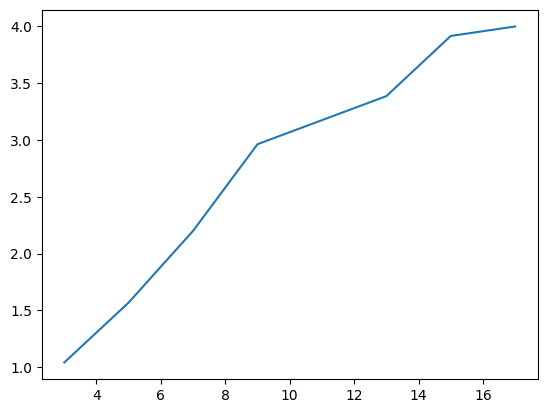

In [941]:
plt.plot(x_values, y_values,)
plt.show()

## 3. Коренева кореляція y = a√x + b

In [942]:
n_i = np.array(df_data.sum(axis=0))


In [943]:
def gauss_elimination_root_correlation(x_i, y_xi, n_i):
    sum_n_sqrt_x = sum(n * np.sqrt(x) for n, x in zip(n_i, x_i))
    sum_n_x = sum(n * x for n, x in zip(n_i, x_i))
    sum_n = sum(n_i)

    sum_n_y_n = sum(n * y for n, y in zip(n_i, y_xi))
    sum_n_y_sqrt_x = sum(n * y * np.sqrt(x) for n, x, y in zip(n_i, x_i, y_xi))
    sum_n_y_x = sum(n * y * x for n, x, y in zip(n_i, x_i, y_xi))

    A = np.array([
        [sum(n_i * np.sqrt(x) for n_i, x in zip(n_i, x_i)), sum_n, sum_n_y_n],
        [sum_n_x, sum_n_sqrt_x, sum_n_y_sqrt_x]
    ], dtype=float)

    def temp(A):
        n = len(A)
        for i in range(n):
            A[i] = A[i] / A[i, i]
            for j in range(i+1, n):
                A[j] = A[j] - A[j, i] * A[i]

        x = np.zeros(n)
        for i in range(n-1, -1, -1):
            x[i] = A[i, -1] - np.dot(A[i, i+1:n], x[i+1:n])
        return x

    coefficients = temp(A)

    a, b = coefficients

    return a, b

In [944]:
a, b = gauss_elimination_root_correlation(x_values, y_values, n_i)
a,b

(1.3392724090629646, -1.3029408473652275)

## Графіки

In [945]:
def plot_sqrt_corr(a, b, x, y):
    def f(x):
        return a * np.sqrt(x) + b
    

    plt.plot(x, y, label="Функція")
    plt.plot(x, f(x), label="Коренева кореляція")

    plt.legend()

    plt.show()


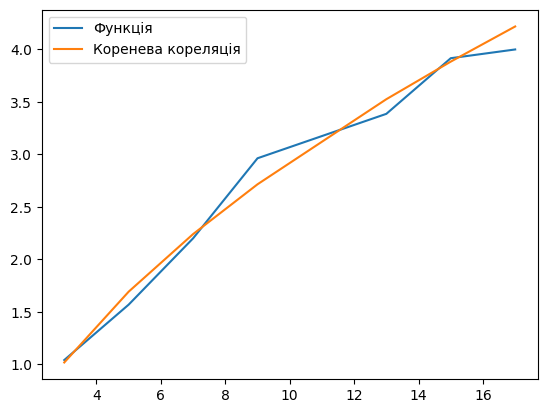

In [946]:
plot_sqrt_corr(a, b, x_values, y_values)


## Рівняння 

In [947]:

print(f"{a}√x + {b}")


1.3392724090629646√x + -1.3029408473652275


## Дисперсія

In [948]:
def dispersion(x_i, y_i, n_ij):
    n = sum(sum(n_ij[i]) for i in range(len(n_ij)))
    def f(x):
        return a * np.sqrt(x) + b
    return sum([(y_i[j] - f(x_i[i])) ** 2 * n_ij[j][i] for j in range(len(y_i)) for i in range(len(x_i))]) / n

my_dispersion = dispersion(x_values, np.array(df_data.index), n_ij = np.array(df_data))
print('Дисперсія: ', my_dispersion)

Дисперсія:  0.08861522147592434


## Відхилення


In [949]:
def scattering(x_i, y_i, n_i):
    def f(x):
        return a * np.sqrt(x) + b
    
    return sum([(y_i[i] - f(x_i[i])) ** 2 * n_i[i] for i in range(len(x_i))])

In [951]:
print("Сума квадратiв вiдхилень δ2: ", scattering(x_values,y_values,n_i)
)


Сума квадратiв вiдхилень δ2:  2.674348440643004
